# Employee Turnover Analytics
# ---------------------------

# 0 Importing necessary modules

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc

# 1. DATA QUALITY CHECK

In [87]:
hrD = pd.read_excel('1688640705_hr_comma_sep.xlsx')

## 1.1 Viewing the data for various columns

In [88]:
hrD.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [89]:
print("Unique column List: ", hrD.columns.unique())

Unique column List:  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [90]:
print("Rows and columns of data: ", hrD.shape)

Rows and columns of data:  (14999, 10)


## 1.2 Reading data for any missing values

In [91]:
print("Column List of data: ", hrD.columns.unique())
print()

Column List of data:  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')



Identification of Null values

Results: There are no null value found in any columns

In [92]:
print("Result: There is no Null value present in data, see report below:")
print()
print(hrD.isna().sum())

Result: There is no Null value present in data, see report below:

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


# 2. Factors contributed most to employee turnover 

## 2.1 Draw a heatmap of the Correlation Matrix 

### 2.1.1 Method 1 - With all numerical columns

Selecting numerical columns using select_dtypes using parameter to include numbers

In [93]:
hrD_num_cols = hrD.select_dtypes(include='number')

Resulting data to play with

In [94]:
hrD_num_cols.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0


Creation of correlation Matrix

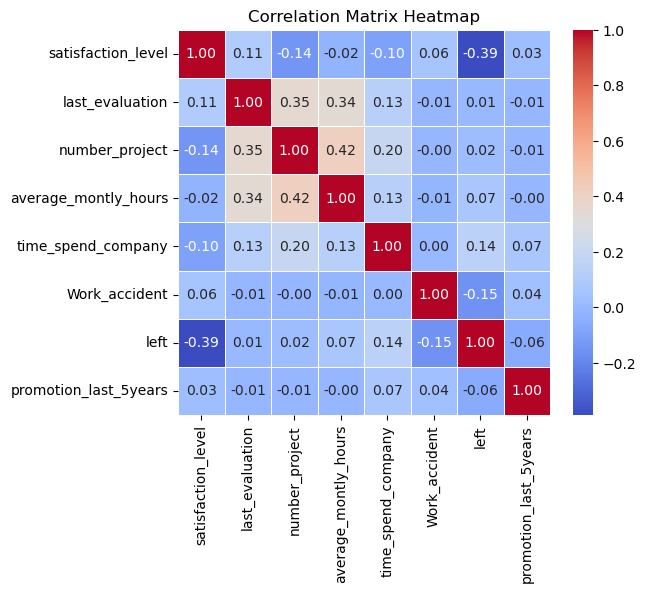

In [95]:
correlation_matrix = hrD_num_cols.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Result: 

A Slight correlation is visible between 
- 'Last evaluation' & 'Number of Projects' (0.35)
- 'Number of projects' & 'Average Monthly hours' (0.42)

### 2.1.2 Method 2 - ACTUAL Numerical COlumns

In [96]:
hrD_num_cols = [x_var for x_var in hrD.columns if x_var not in ['Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']]

Creation of correlation Matrix

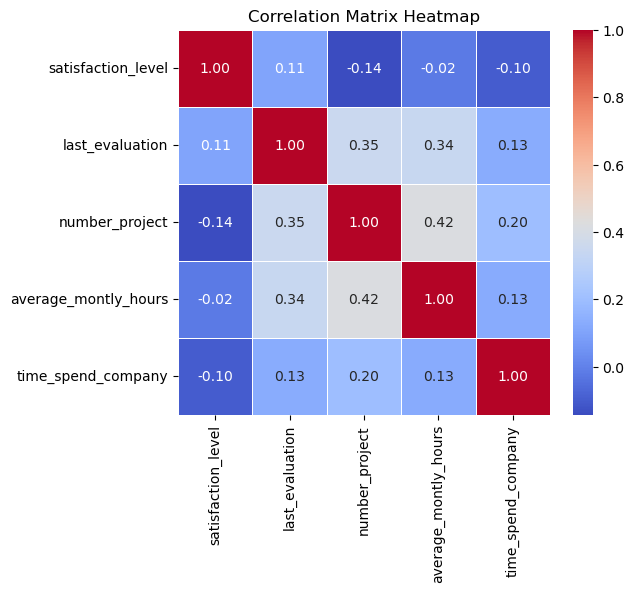

In [97]:
correlation_matrix = hrD[hrD_num_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 2.2 Draw Distribution Plots

### 2.2.1 Employee Satisfaction

In [98]:
hrD.satisfaction_level.count()

14999

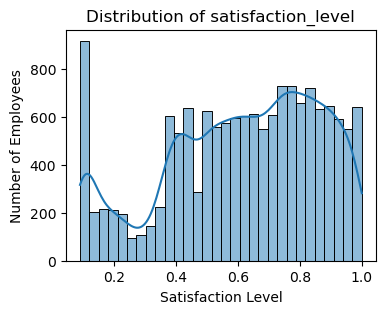

In [99]:
plt.figure(figsize=(4, 3))
sns.histplot(hrD['satisfaction_level'], kde=True)
plt.title('Distribution of satisfaction_level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees')
plt.show()

Result: There are huge number of unsatisfied employees ahving satisfaction level than 0.5

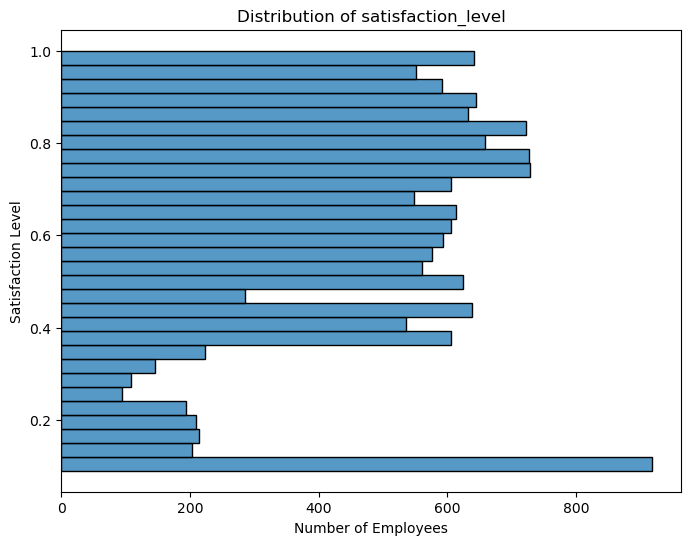

In [100]:
plt.figure(figsize=(8, 6))
sns.histplot(y=hrD['satisfaction_level'])
plt.title('Distribution of satisfaction_level')
plt.ylabel('Satisfaction Level')
plt.xlabel('Number of Employees')
plt.show()

### 2.2.2 Employee Evaluation

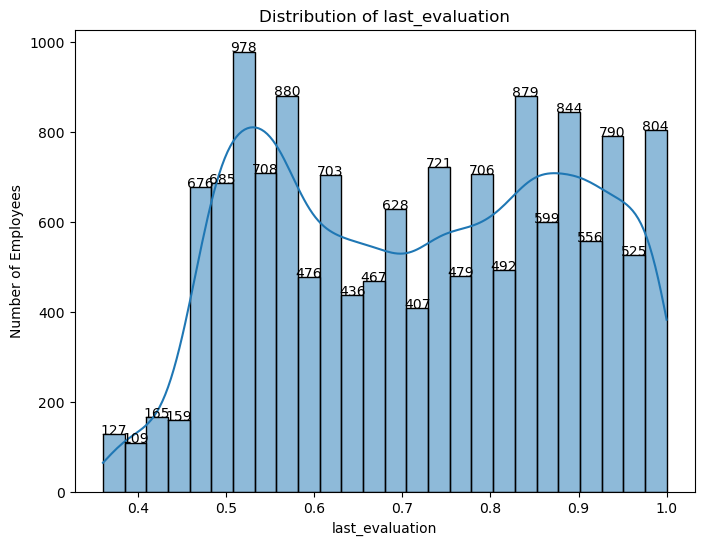

In [101]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(hrD['last_evaluation'], kde=True)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title('Distribution of last_evaluation')
plt.xlabel('last_evaluation')
plt.ylabel('Number of Employees')
plt.show()

Result: There are huge number of satisfied employees

Method 2 - Creating direct bar plot

<Axes: xlabel='last_evaluation'>

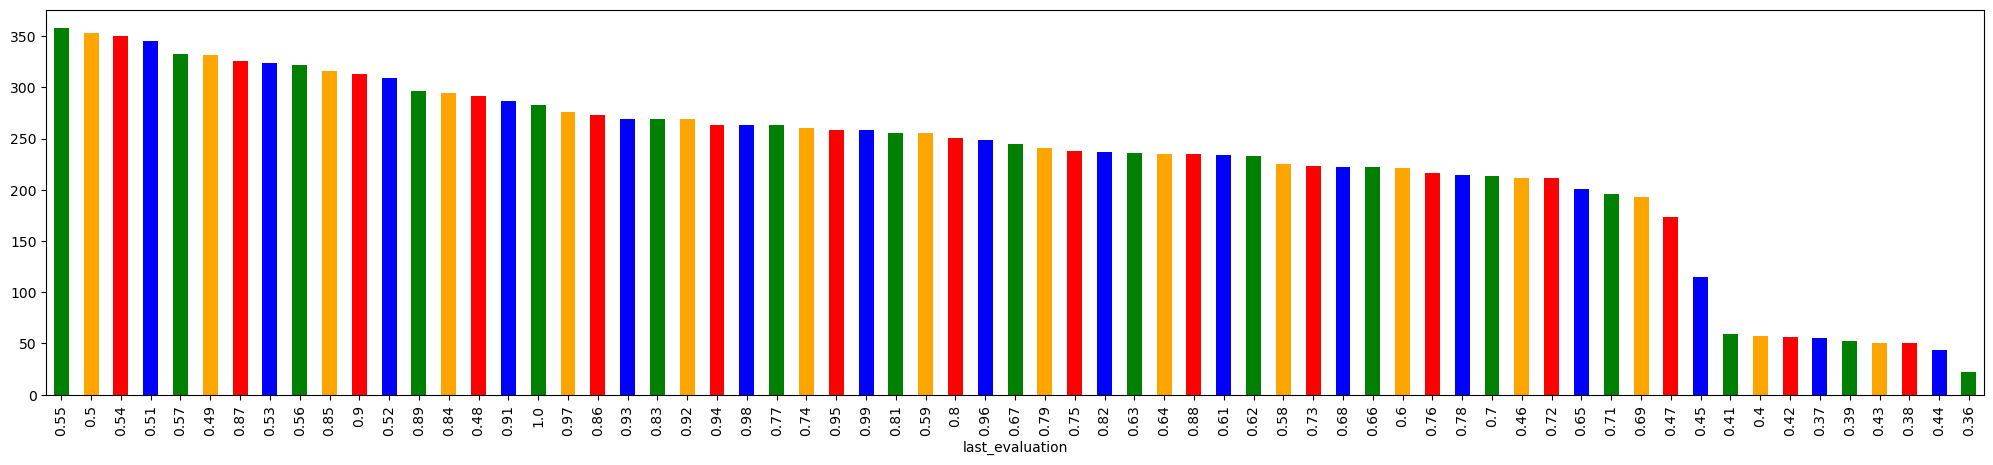

In [102]:
hrD.last_evaluation.value_counts()

hrD.last_evaluation.value_counts().plot(kind='bar', figsize=(25, 5), color=['green', 'orange', 'red', 'blue'])


### 2.2.3 Employee Average Monthly Hours 

Text(0, 0.5, 'Number of Employees')

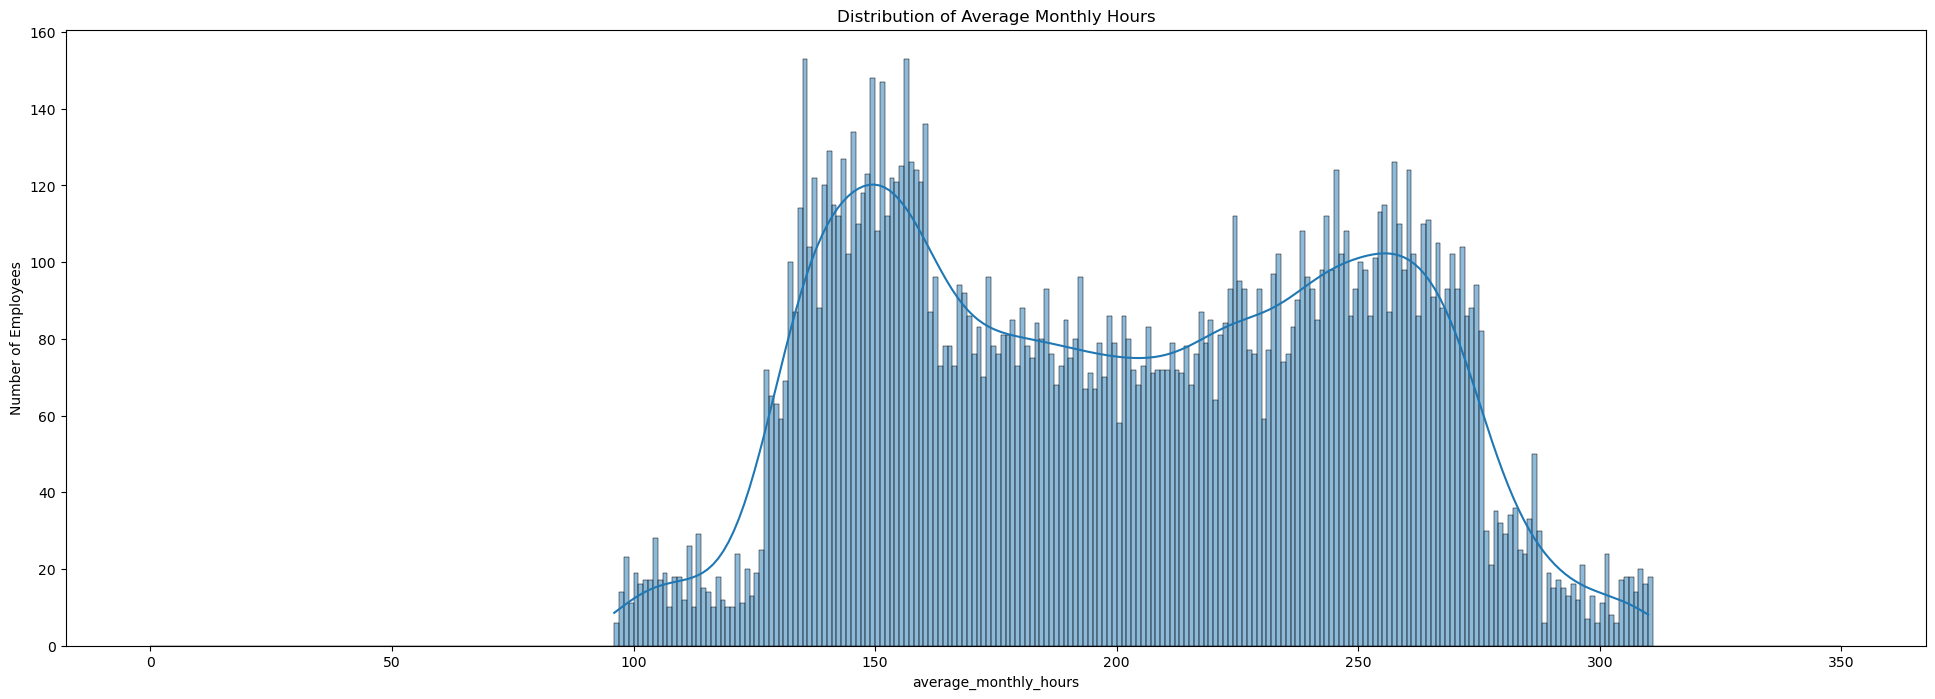

In [103]:
plt.figure(figsize=(24, 8))
sns.histplot(hrD['average_montly_hours'], kde=True, bins=np.arange(0, 351, 1))
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('average_monthly_hours')
plt.ylabel('Number of Employees')

Result: Majority of employess works between 130 - 280 hrs range

## 2.3 BAR PLOT - Employee Project Count

left
0    43274
1    13768
Name: number_project, dtype: int64


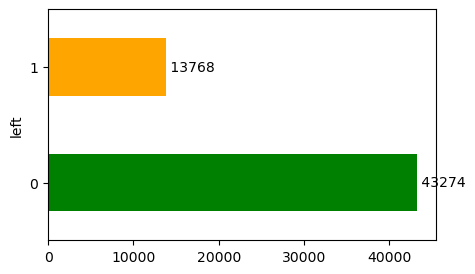

In [104]:
print(hrD.groupby(['left'])['number_project'].sum())
ax = hrD.groupby(['left'])['number_project'].sum().plot(kind='barh', color=['green', 'orange'], figsize=(5, 3))
# Add values count in front of each bar
for i, value in enumerate(hrD.groupby(['left'])['number_project'].sum()):
    ax.text(value, i, f' {value}', va='center')

Result: Left employess completed 13768 projects while the employees staying with complany completed 43274 projects.

A total count of employees who left v/s who stayed

left
0    11428
1     3571
Name: count, dtype: int64

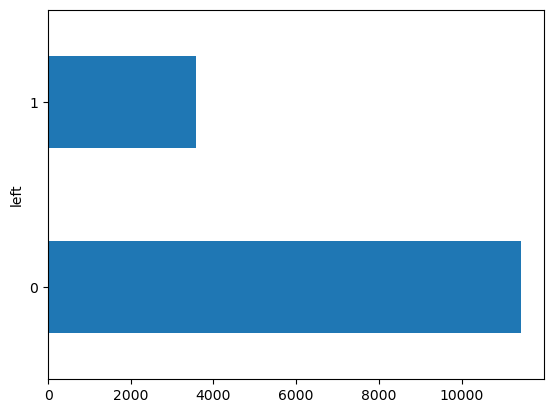

In [105]:
hrD.left.value_counts().plot.barh()
hrD.left.value_counts()


# 3. Clustering of Employees 

Identifying employees who left the organization based on satisfaction and evaluation

## 3.1 Choose columns satisfaction_level, last_evaluation and left.

In [106]:
left_employees = hrD[hrD['left'] == 1][['satisfaction_level', 'last_evaluation']]
left_employees.shape

(3571, 2)

So we recived 3571 rows of the case where employess left out of 14999 employees

In [107]:
hrD[hrD['left'] == 1][['satisfaction_level', 'last_evaluation']].head(2)

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86


### 3.1.1 Standardization of data 

In [108]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
left_employees_std = ss.fit_transform(left_employees)

In [109]:
left_employees_std

array([[-0.22773328, -0.9517667 ],
       [ 1.36379989,  0.71788783],
       [-1.25086175,  0.81907901],
       ...,
       [-0.26562693, -0.9517667 ],
       [-1.25086175,  1.22384375],
       [-0.26562693, -1.00236229]])

## 3.2 KMeans clustering of employees who left the company into 3 clusters.

In [110]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [111]:
#X, _ = make_blobs(n_samples=3571, centers=3, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=3)
kmeans.fit(left_employees)

KMeans(n_clusters=3)

Viewing Cluster centroids

In [112]:
kmeans.cluster_centers_

array([[0.11115466, 0.86930085],
       [0.41014545, 0.51698182],
       [0.80851586, 0.91170931]])

In [113]:
print(kmeans.labels_)

[1 2 0 ... 1 0 1]


In [114]:
left_employees['cluster_number'] = kmeans.labels_

In [115]:
left_employees.head()

,satisfaction_level,last_evaluation,cluster_number
0,0.38,0.53,1
1,0.80,0.86,2
2,0.11,0.88,0
3,0.72,0.87,2
4,0.37,0.52,1


Now employees that left are put in their appropriate clusters

### 3.2.1 Visualizing the cluster

Cluster could be visualized using scatter plot

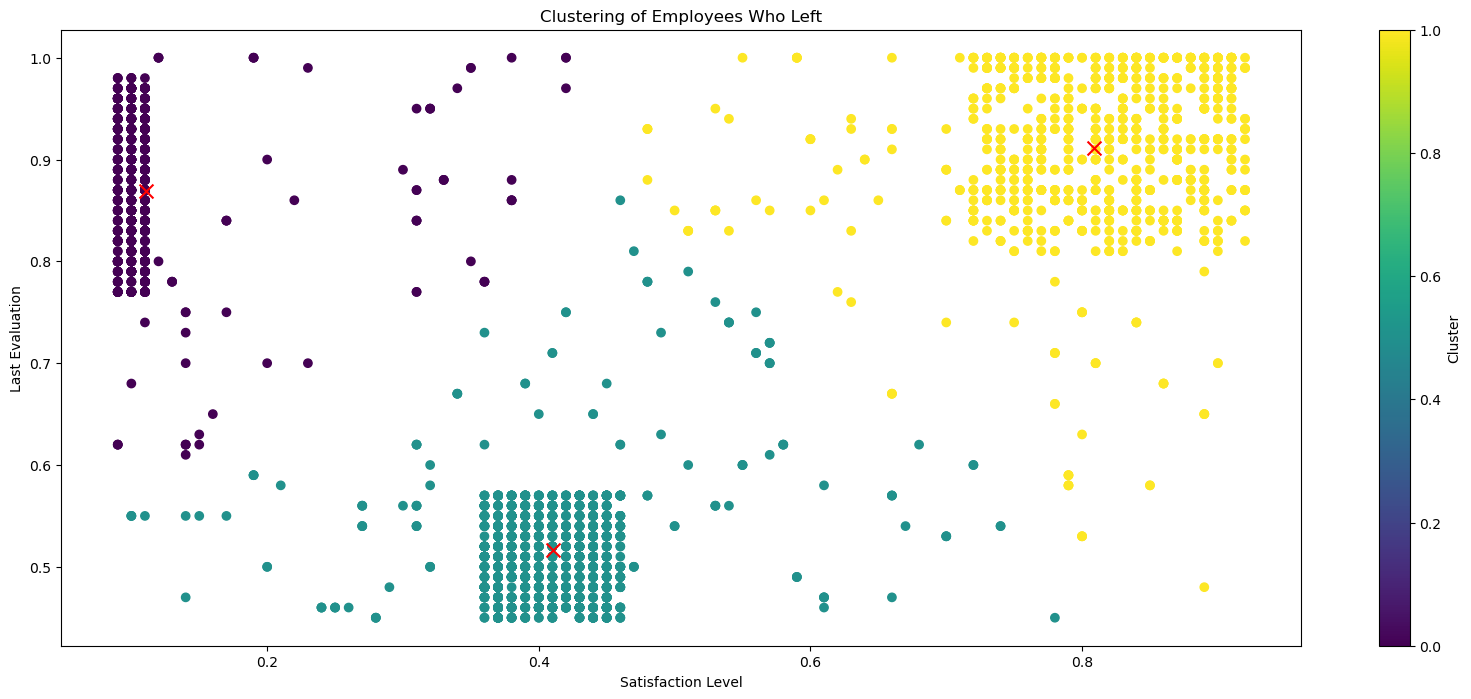

In [116]:
plt.figure(figsize=(20, 8))
plt.scatter(left_employees['satisfaction_level'], left_employees['last_evaluation'], c=left_employees['cluster_number'],edgecolors='face')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clustering of Employees Who Left')
plt.colorbar(label='Cluster')
plt.show()

## 3.3 Analyze the clusters

In [117]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: Satisfaction Level = {center[0]}, Last Evaluation = {center[1]}")

Cluster Centers:
Cluster 1: Satisfaction Level = 0.11115466101694876, Last Evaluation = 0.8693008474576271
Cluster 2: Satisfaction Level = 0.41014545454545454, Last Evaluation = 0.5169818181818182
Cluster 3: Satisfaction Level = 0.8085158648925284, Last Evaluation = 0.9117093142272262


In [118]:
left_employees.groupby('cluster_number')['satisfaction_level'].mean()

cluster_number
0    0.111155
1    0.410145
2    0.808516
Name: satisfaction_level, dtype: float64

In [119]:
left_employees.groupby('cluster_number')['last_evaluation'].mean()

cluster_number
0    0.869301
1    0.516982
2    0.911709
Name: last_evaluation, dtype: float64

In [120]:
left_employees.groupby('cluster_number').agg({'satisfaction_level': 'mean', 'last_evaluation': 'mean'})

# OR

left_employees.groupby('cluster_number')[['satisfaction_level', 'last_evaluation']].mean()

,satisfaction_level,last_evaluation
cluster_number,,
0,0.111155,0.869301
1,0.410145,0.516982
2,0.808516,0.911709


In [121]:
#left_employess.groupby('cluster_number')[['satisfaction_level', 'last_evaluation']].sum()

<Axes: ylabel='cluster_number'>

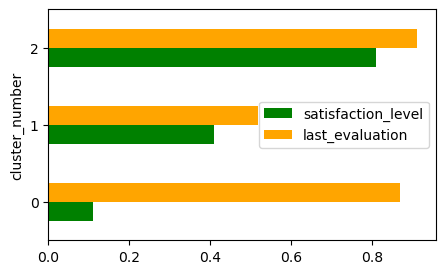

In [122]:
left_employees.groupby('cluster_number')[['satisfaction_level', 'last_evaluation']].mean().plot(kind='barh', color=['green', 'orange'], figsize=(5, 3))

### 3.3.1 Analyisis results

In [123]:
cluster_count = left_employees['cluster_number'].value_counts()
left_employees['cluster_number'].value_counts()

cluster_number
1    1650
2     977
0     944
Name: count, dtype: int64

In [124]:
left_employees[left_employees['cluster_number'] == 0].value_counts().sum()

944

In [125]:
cluster_mean_stats = left_employees.groupby('cluster_number')[['satisfaction_level', 'last_evaluation']].mean()

In [126]:
print("Printing Cluster Statistics:")
for cluster in cluster_mean_stats.index:
    print(f"Cluster Number: {cluster} :  Number of Employees: {cluster_count[cluster]} <--> Mean Satisfaction Level: {cluster_mean_stats.loc[cluster, 'satisfaction_level']} <--> Mean Last Evaluation: {cluster_mean_stats.loc[cluster, 'last_evaluation']}")

Printing Cluster Statistics:
Cluster Number: 0 :  Number of Employees: 944 <--> Mean Satisfaction Level: 0.11115466101694917 <--> Mean Last Evaluation: 0.8693008474576271
Cluster Number: 1 :  Number of Employees: 1650 <--> Mean Satisfaction Level: 0.41014545454545454 <--> Mean Last Evaluation: 0.5169818181818182
Cluster Number: 2 :  Number of Employees: 977 <--> Mean Satisfaction Level: 0.8085158648925281 <--> Mean Last Evaluation: 0.9117093142272262


Results:

- Employees in Cluster 2 have relatively low satisfaction levels (0.111) but high evaluation scores (0.871). This suggests that these employees are likely dissatisfied despite receiving high evaluations
- Employees in Cluster 0 have moderate satisfaction levels (0.412) and moderate evaluation scores (0.517). This cluster might represent employees who are moderately satisfied with their work and receive average evaluation scores.
- Employees in Cluster 1 have high satisfaction levels (0.808) and high evaluation scores (0.916). This cluster likely represents employees who are highly satisfied with their work and perform well according to evaluations.

# 4. SMOTE technique

## 4.1 PRE-PROCESSING - Converting Categorical to Numerical

### 4.1.1 Separating Numerical & Categorical Columns

In [127]:
hrD_cat_cols = hrD.select_dtypes(exclude='number')
hrD_num_cols = hrD.select_dtypes(include='number')

In [128]:
print(hrD_cat_cols.shape, hrD_num_cols.shape)

(14999, 2) (14999, 8)


### 4.1.2 Applying get_dummies() to the categorical variables

In [129]:
# Printing columns for categorical variables

hrD_cat_cols.columns.unique()

Index(['sales', 'salary'], dtype='object')

In [130]:
hrD_cat_cols_dummies = pd.get_dummies(hrD_cat_cols, columns=['sales', 'salary'], dtype = int)

# dropfirst could be used to create n-1 dummy variables rather than n dummy variables

### 4.1.3 Comnbining Categorical variables & numerical variables

In [131]:
hrD_updated = pd.concat([hrD_num_cols, hrD_cat_cols_dummies], axis = 1)

In [132]:
print(hrD_updated.shape)
hrD_updated.head(2)

(14999, 21)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [133]:
hrD_updated.columns.unique()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

## 4.2 Stratified slitting of train & test

Defining x & y variables for this modified data set

In [134]:
x = hrD_updated.drop(columns = 'left')
y = hrD_updated['left']

Splitting the data into train & test

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

# stratify=y ensures that the class distribution of the target variable y is maintained in both 
# the training and testing sets. This is important, especially if your target variable is imbalanced.

### 4.3 Upsample the train dataset using SMOTE technique from the imblearn module.

<Axes: ylabel='left'>

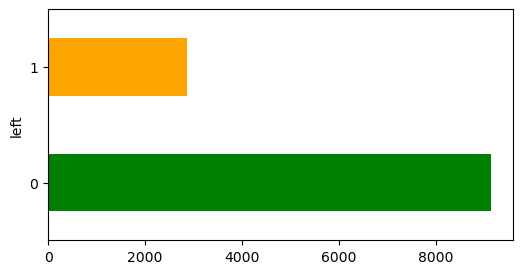

In [136]:
y_train.value_counts().plot(kind='barh', color=['green', 'orange'], figsize=(6, 3))

Currently data is unbalanced

In [137]:
pip install imblearn --no-warn-script-location

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
smote = SMOTE(random_state=42)

In [140]:
x_smote_resampled, y_smote_resampled = smote.fit_resample(x_train, y_train)

<Axes: ylabel='left'>

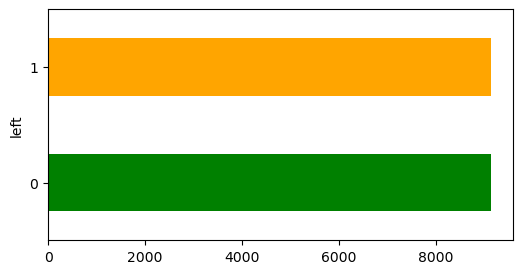

In [141]:
y_smote_resampled.value_counts().plot(kind='barh', color=['green', 'orange'], figsize=(6, 3))

In [142]:
print(x_smote_resampled.shape)
y_smote_resampled

(18284, 20)


0        0
1        1
2        0
3        0
4        0
        ..
18279    1
18280    1
18281    1
18282    1
18283    1
Name: left, Length: 18284, dtype: int64

We can see that left out data is balanced using SMOTE

# 5. Fold Cross Validation Model Training

## 5.1 Data preparation for Various models.

### 5.1.1 Importing required models

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

### 5.1.2 Creating x & y variables if not already created

In [144]:
#x_hrD = hrD.drop(columns=['left','sales','salary'])
#y_hrD = hrD['left']

### 5.1.3 Splitting data into train & test

In [145]:
print(x.shape,y.shape)

(14999, 20) (14999,)


In [146]:
x_train_updated, x_test_updated, y_train_updated, y_test_updated = train_test_split(x, y, test_size=.2, random_state=123)

### 5.1.4 Standardization of dta

In [147]:
sc = StandardScaler()

In [148]:
x_train_standardized = sc.fit_transform(x_train_updated)
x_test_standardized = sc.transform(x_test_updated)

In [149]:
print(x_train_standardized.shape,x_test_standardized.shape)

(11999, 20) (3000, 20)


## 5.2 Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.

### 5.2.1 Performing Logistic Regression without CV

In [150]:
logR = LogisticRegression(max_iter=5000)

In [151]:
logR.fit(x_train_standardized, y_train_updated)

LogisticRegression(max_iter=5000)

In [152]:
logR.predict_proba(x_test_standardized)

array([[0.94818252, 0.05181748],
       [0.94962572, 0.05037428],
       [0.94558532, 0.05441468],
       ...,
       [0.80240708, 0.19759292],
       [0.78348135, 0.21651865],
       [0.78787941, 0.21212059]])

In [153]:
y_pred_log = logR.predict(x_test_standardized)

In [154]:
pd.crosstab(y_test_updated, logR.predict(x_test_standardized))

col_0,0,1
left,,
0,2135,156
1,475,234


In [155]:
accuracy_score(y_test_updated, y_pred_log)*100

78.96666666666667

In [156]:
print(classification_report(y_test_updated, y_pred_log))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2291
           1       0.60      0.33      0.43       709

    accuracy                           0.79      3000
   macro avg       0.71      0.63      0.65      3000
weighted avg       0.77      0.79      0.77      3000



### 5.2.2 Performing Logistic Regression with 5 fold cross validation

#### 5.2.2.1 Defining the Logistic regression model

In [157]:
log_reg_model = LogisticRegression()
sgd_logistic = SGDClassifier(loss = 'log_loss')

#### 5.2.2.2 Define the hyperparameters grid

In [158]:
penalty = ['l1', 'l2', 'elasticnet']
alpha = [.01, 1, 10, 100, 1000]
l1_ratio = [0, 1, .1, .2, .8]
learning_rate = ['constant', 'adaptive']
eta0 = [.001, .01, .1, .2, .8, .08, 1, 10, 100]


param_dict = dict(penalty = penalty, alpha = alpha, l1_ratio = l1_ratio, learning_rate = learning_rate, eta0 = eta0)

In [159]:
rndm_cv = RandomizedSearchCV(estimator=sgd_logistic, param_distributions=param_dict, cv=5, n_iter=20, n_jobs=-1, verbose=2)

In [160]:
rndm_cv

RandomizedSearchCV(cv=5, estimator=SGDClassifier(loss='log_loss'), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'alpha': [0.01, 1, 10, 100, 1000],
                                        'eta0': [0.001, 0.01, 0.1, 0.2, 0.8,
                                                 0.08, 1, 10, 100],
                                        'l1_ratio': [0, 1, 0.1, 0.2, 0.8],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   verbose=2)

In [161]:
rndm_cv.fit(x_train_standardized, y_train_updated)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SGDClassifier(loss='log_loss'), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'alpha': [0.01, 1, 10, 100, 1000],
                                        'eta0': [0.001, 0.01, 0.1, 0.2, 0.8,
                                                 0.08, 1, 10, 100],
                                        'l1_ratio': [0, 1, 0.1, 0.2, 0.8],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   verbose=2)

#### 5.2.2.3 Retrieving best parameters

In [162]:
print(rndm_cv.best_params_, "\n", rndm_cv.best_score_, "\n", rndm_cv.best_estimator_)

{'penalty': 'elasticnet', 'learning_rate': 'constant', 'l1_ratio': 0.8, 'eta0': 0.8, 'alpha': 0.01} 
 0.7889030498818953 
 SGDClassifier(alpha=0.01, eta0=0.8, l1_ratio=0.8, learning_rate='constant',
              loss='log_loss', penalty='elasticnet')


In [163]:
y_pred_logr = rndm_cv.predict(x_test_standardized)

#### 5.2.2.4 generating Classification Report

In [164]:
print(classification_report(y_test_updated, y_pred_logr))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2291
           1       0.53      0.23      0.32       709

    accuracy                           0.77      3000
   macro avg       0.66      0.58      0.59      3000
weighted avg       0.73      0.77      0.73      3000



Results:
    - As per Classification report accuracy from Logistic regression is 79%.

## 5.3 Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [165]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### 5.3.1 Defining Random Forst CLassifier Model

In [166]:
r_forest_model = RandomForestClassifier(oob_score=True)

# oob_score : bool or callable, default=False
#     Whether to use out-of-bag samples to estimate the generalization score.

### 5.3.2 Doing Hyper Parameter tuning

In [167]:


import numpy as np
n_estimators = np.arange(5,20)
criterion = ["gini", "entropy"]
min_samples_split=[30,40,50,60]
min_samples_leaf=[20, 25, 30, 35]
max_features = ['sqrt', 'log2', .2, .5, .7]

In [168]:
param_rf = {'n_estimators': n_estimators,
           'criterion': criterion,
           'min_samples_leaf': min_samples_leaf,
           'min_samples_split': min_samples_split,
           'max_features': max_features}

In [169]:
rf_random = RandomizedSearchCV(estimator=r_forest_model, param_distributions=param_rf, n_iter=25, n_jobs=-1)

In [170]:
rf_random.fit(x_train_standardized, y_train_updated)

C:\Users\Gangwar's\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomizedSearchCV(estimator=RandomForestClassifier(oob_score=True), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2', 0.2,
                                                         0.5, 0.7],
                                        'min_samples_leaf': [20, 25, 30, 35],
                                        'min_samples_split': [30, 40, 50, 60],
                                        'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [171]:
rf_random.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=25,
                       min_samples_split=40, n_estimators=13, oob_score=True)

### 5.3.3 Predicting values based on model

In [172]:
#rf_random.predict(x_test_updated)

In [173]:
y_pred_rf = rf_random.predict(x_test_standardized)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 5.3.4 Generating Classification report and identifying accuracy

In [174]:
print(classification_report(y_test_updated, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2291
           1       0.96      0.92      0.94       709

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [175]:
#y_pred_rf

In [176]:
print("Model Accuracy: ", accuracy_score(y_test_updated, y_pred_rf)*100, "%")

Model Accuracy:  97.1 %


## 5.4.Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [177]:
#pip install xgboost
from xgboost import XGBRegressor, XGBClassifier

### 5.4.1 Defining Gradient boost Classifier

In [178]:
xgb = XGBClassifier()

### 5.4.2 Doing hyper parameter tuning

In [179]:
gbm_param = {
    'n_estimators': [40,50,60],
    'max_depth':[4,6,8],
    'learning_rate':[.4,.2,.5,.8],
    'colsample_bytree':[.01,.02,.03,.4,.5,.8]
}

In [180]:
xgb_rscv = RandomizedSearchCV(estimator=xgb, scoring='neg_mean_squared_error',param_distributions = gbm_param, n_iter=20, n_jobs=-1, verbose = 2)

In [181]:
xgb_rscv.fit(x_train_standardized, y_train_updated)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.01, 0.02, 0.03,
                                                             0.4, 0.5, 0.8],
                                        'learning_rate': [0.4, 0.2, 0.5, 0.8],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [40, 50, 60]},
                   scoring='neg_mean_squared_error', verbose=2)

In [182]:
xgb_rscv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 5.4.3 Predicting values based on model

In [183]:
y_pred_xgb = xgb_rscv.predict(x_test_standardized)

In [184]:
#classification_report(y_test_updated, y_pred)

### 5.4.4 Generating classification report and identifying accuracy

In [185]:
print(classification_report(y_test_updated, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2291
           1       0.99      0.98      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [186]:
print("Model Accuracy: ", accuracy_score(y_test_updated, y_pred_xgb)*100, "%")

Model Accuracy:  99.23333333333333 %


# 6. Identifying best models

## 6.1 Find the ROC/AUC for each model and plot the ROC curve.

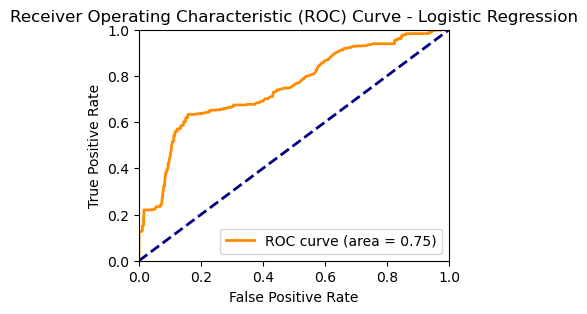

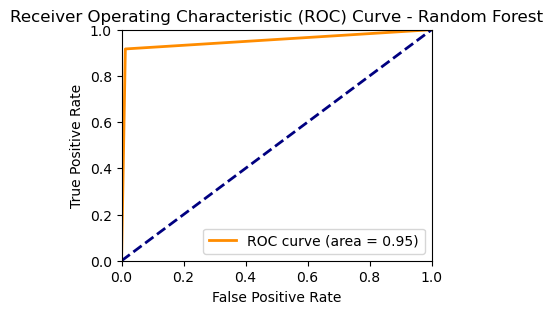

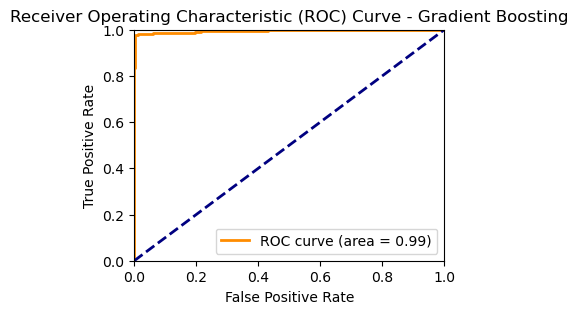

In [187]:
# For Logistic Regression

y_pred_proba_logr = rndm_cv.predict_proba(x_test_standardized)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_updated, y_pred_proba_logr)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# For Random Forest Classifier

y_pred_proba = rf_random.predict_proba(x_test_standardized)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_updated, y_pred_rf)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# For Gradient Boosting

y_pred_proba_xgb = xgb_rscv.predict_proba(x_test_standardized)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_updated, y_pred_proba_xgb)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

## 6.2 Find the confusion matrix for each of the models.

In [188]:
# For Logisitic Regression

cm_log = confusion_matrix(y_test_updated, y_pred_log)

# Plot the confusion matrix in square blocks
plt.figure(figsize=(4, 3))
plt.imshow(cm_log, interpolation='nearest', cmap='OrRd')
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
# Add numerical values in each cell
thresh = cm_log.max() / 2.
for i in range(cm_log.shape[0]):
    for j in range(cm_log.shape[1]):
        plt.text(j, i, format(cm_log[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

# For Gradient boosting

cm_xgb = confusion_matrix(y_test_updated, y_pred_xgb)
# Plot the confusion matrix in square blocks
plt.figure(figsize=(4, 3))
plt.imshow(cm_xgb, interpolation='nearest', cmap='YlOrBr')
tick_marks = np.arange(len(cm_xgb))
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
# Add numerical values in each cell
thresh = cm_xgb.max() / 2.
for i in range(cm_xgb.shape[0]):
    for j in range(cm_xgb.shape[1]):
        plt.text(j, i, format(cm_xgb[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_rf[i, j] > thresh else "black")

plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Confusion Matrix - Gradient boosting')
plt.tight_layout()
plt.show()

# For Random forest classifier

cm_rf = confusion_matrix(y_test_updated, y_pred_rf)
# Plot the confusion matrix in square blocks
plt.figure(figsize=(4, 3))
plt.imshow(cm_rf, interpolation='nearest', cmap='YlOrBr')
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
# Add numerical values in each cell
thresh = cm_rf.max() / 2.
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, format(cm_rf[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_rf[i, j] > thresh else "black")

plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.tight_layout()
plt.show()

NameError: name 'confusion_matrix' is not defined

## 6.3 Which metric needs to be used from confusion Matrix 

Recall (Sensitivity): Recall measures the ability of a classifier to correctly identify all relevant instances, or the proportion of true positives that were correctly identified by the model. A high recall means that the classifier is good at capturing positive instances, minimizing false negatives.

Precision: Precision measures the ability of a classifier to correctly identify only the relevant instances among all the instances it has labeled as positive, or the proportion of true positives among all predicted positives. A high precision means that the classifier is good at avoiding false positives.

### 6.3.1 Results

We will go with Gradient Boosting Classifier model as it has better accuracy and correct classification of True Positive and False Negative. As recall and precision both are important factor, still precision is good at avoiding false positives, so it is good for deciding best model.

# 7. Suggest Retention strategy for targeted employees

## 7.1 Using the best model, predict the probability of employee turnover in the test data.

### 7.1.1 Predicting the probabilities from test data

In [ ]:
y_predicted_probability = xgb_rscv.predict_proba(x_test_standardized)

Above command will return array of probabilities for both the classes 0 & 1

### 7.1.2 Generating array of results referring class for predicted y 

In [ ]:
np.argmax(xgb_rscv.predict_proba(x_test_standardized), axis = 1)

### 7.1.3 Generating array of results referring class for actual y test values

In [ ]:
np.array(y_test_updated)

### 7.1.4 Comparion results for actual v/s predicted for test data

In [ ]:
comparison = np.argmax(xgb_rscv.predict_proba(x_test_standardized), axis = 1) == np.array(y_test_updated)

In [ ]:
print("Comparison Result:", comparison)

## 7.2 Employees categorization into zones

In [ ]:
employee_probabilities = xgb_rscv.predict_proba(x_test_standardized)[:,1]

In [ ]:
safe_zone_threshold = 0.20
low_risk_zone_threshold = 0.60
medium_risk_zone_threshold = 0.90

In [ ]:
zones = []
for probability in employee_probabilities:
    if probability < safe_zone_threshold:
        zones.append("Safe Zone (Green)")
    elif safe_zone_threshold < probability < low_risk_zone_threshold:
        zones.append("Low Risk Zone (Yellow)")
    elif low_risk_zone_threshold < probability < medium_risk_zone_threshold:
        zones.append("Medium Risk Zone (Orange)")
    else:
        zones.append("High Risk Zone (Red)")

In [ ]:
# Print the distribution of employees across different zones
zone_counts = {zone: zones.count(zone) for zone in set(zones)}
print("Employee Distribution Across Zones:")
for zone, count in zone_counts.items():
    print(f"{zone}: {count} employees")

In [ ]:
# Suggest retention strategies for each zone
print("\nRetention Strategies:")
print("Safe Zone (Green): Implement recognition programs, career development opportunities.")
print("Low Risk Zone (Yellow): Monitor performance closely, provide feedback and support.")
print("Medium Risk Zone (Orange): Offer training and mentorship programs, address job satisfaction concerns.")
print("High Risk Zone (Red): Conduct exit interviews, identify root causes of dissatisfaction, implement urgent retention measures.")

# 8. Variables Explanation

- hrD_num_cols: Numerical columns from Data frame.
- left_employees_std: Fit and transformed complete data set.
- cluster_number: Column explaining which cluster a particular record belongs to.
- hrD_cat_cols: Categorical columns from data frame.
- hrD_updated: A mix of numerical columns + Converted categorical columns (dummies)
- x: hrD_updated minus 'left' column from it.
- y: left column of hrD_updated
- x_train, x_test, y_train, y_test: Splitted Train and test data of above x & y variables.
- x_smote_resampled, y_smote_resampled: fit resampled results of above x_tarin & y_train data for SMOTE.
- x_train_updated, x_test_updated, y_train_updated, y_test_updated: Splitted Train and test data of above x & y variables.
- x_train_standardized: Fit and transformed x train data x_train_updated.
- x_test_standardized: Fit x test data x_test_updated.
- y_pred_log: Predicted results of logistic regression model depending on x_train_standardized values.
- y_pred_rf: Predicted results of Random Forest Classifier model depending on x_train_standardized values.
- y_pred_xgb: Predicted results of XG Boost Classifier model depending on x_train_standardized values.
- y_pred_proba_logr: Predicted probability results of logistic regression model depending on x_train_standardized values.
- y_pred_proba: Predicted probability results of Random Forest Classifier model depending on x_train_standardized values.
- y_pred_proba_xgb: Predicted probability results of XGboost Classifier model depending on x_train_standardized values.
- y_predicted_probability: Predicted probability results of XGboost Classifier model depending on x_train_standardized values.
- employee_probabilities: Predicted probability results of XGboost Classifier model depending on x_train_standardized values.